In [141]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow 
import cv2 as cv
import os 
import sys
from numpy import asarray



from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

import pickle


In [142]:
#========== path of the Test data============= 
path='/Users/samaheralghanmi/Documents/GitHub/ML_Coursework/test/Test_New_IMG/'

#read the csv file that contian the images name and its label 
test=pd.read_csv(r'/Users/samaheralghanmi/Documents/GitHub/ML_Coursework/test/label.csv')

In [143]:
#store the images name in (image_name )
image_name=test['file_name'].to_list()
#store the labels of the images in (label_name ), which tell us the type of tumors 
label_name=test['label'].to_list()
test_labels = [] # Y trian store the informantion that 'if there a tumor or not ' 


In [144]:
#0 means (no_tumor), 1 means (have tumor) this will store in train_labels 

#==================== binary classification===========
for i in range(len(label_name)):  
    if label_name[i] == 'no_tumor':
        test_labels.append(0)
    else:
        test_labels.append(1)

In [145]:
#Print an examples for the two classes      
print("this image is", image_name[0] , label_name[0], "in Class: ", test_labels[0])
print("this image is", image_name[1] , label_name[1], "in Class: ", test_labels[1])



this image is IMAGE_0000.jpg meningioma_tumor in Class:  1
this image is IMAGE_0001.jpg meningioma_tumor in Class:  1


this image is IMAGE_0025.jpg pituitary_tumor in Class:  1


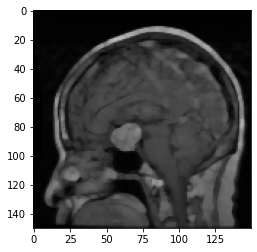

In [146]:

#Now I will read the file of the images and resize the images 
#then I will convert the images to array using np 

test_img = [] # X trian 
img_size= 150 # for using in image resize  

#len(image_name)
for i in range(len(image_name)):
    #print (i)
    image_11 = (path+'/'+image_name[i])
    read = cv.imread(image_11)
    resize = cv.resize(read,(img_size,img_size))
    test_img.append(resize)

test_img = np.array(test_img)
#Example of one image after resizing 
print("this image is", image_name[25] , label_name[25], "in Class: ", test_labels[25])
plt.imshow(test_img[25])

In [147]:
# here we can see how many data set in each class 
np.unique(test_labels)
pd.Series(test_labels).value_counts()

1    163
0     37
dtype: int64

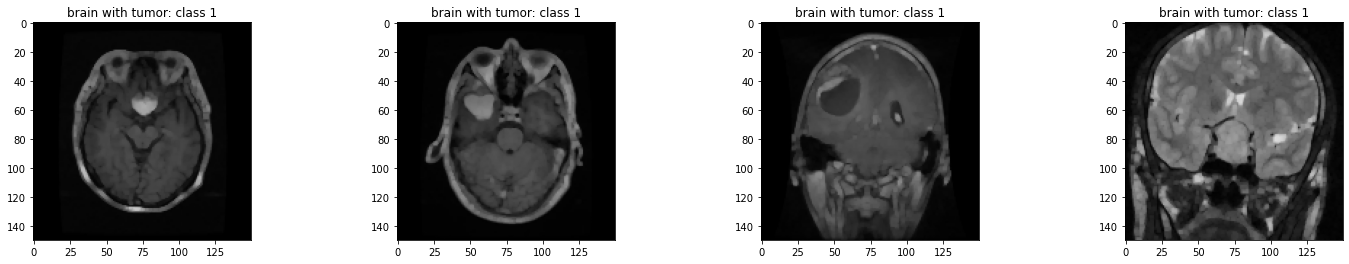

In [148]:
def Data_Visualization():
    c =0

    fig, subplots = plt.subplots(1, 4)
    fig.set_size_inches(25, 4)
    for j in range(len(test_labels)):
        if(c<4):
            if test_labels[j] == 0:
                subplots[j].imshow(test_img[j], cmap="gray")
                subplots[j].set_title("brain with NO tumor: class 0")
            elif test_labels[j] == 1:
                subplots[j].imshow(test_img[j], cmap="gray")
                subplots[j].set_title("brain with tumor: class 1")
        c=c+1


    return plt.show()


Data_Visualization()

In [149]:
#======== Reshape the images ========

test_img = np.array(test_img).reshape(200, -1)

In [150]:
def Test(model_name):
    #==== Loading the model ======
    loaded_model = pickle.load(open(model_name, 'rb'))
    
    #=========== Printing Accurecy 
    print("Accuracy_test:",accuracy_score(test_labels, loaded_model.predict(test_img)))
    
    #=========printing the Classificarion Report: 
    print(classification_report(test_labels, loaded_model.predict(test_img)))

In [151]:
print("=========== Test Result for Random Forest===========")
Test('RF_model.sav')




=========== Test Result for Random Forest===========
Accuracy_test: 0.96
              precision    recall  f1-score   support

           0       0.97      0.81      0.88        37
           1       0.96      0.99      0.98       163

    accuracy                           0.96       200
   macro avg       0.96      0.90      0.93       200
weighted avg       0.96      0.96      0.96       200



In [156]:
print("=========== Test Result for SVM ==================")
Test('SVM_model_Task1.sav')


=========== Test Result for SVM ==================
Accuracy_test: 0.815
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.81      1.00      0.90       163

    accuracy                           0.81       200
   macro avg       0.41      0.50      0.45       200
weighted avg       0.66      0.81      0.73       200



In [154]:
print("=========== Test Result for DTree ==================")
Test('DTree_model_Task1.sav')

=========== Test Result for DTree ==================
Accuracy_test: 0.935
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        37
           1       0.96      0.96      0.96       163

    accuracy                           0.94       200
   macro avg       0.90      0.89      0.89       200
weighted avg       0.93      0.94      0.93       200

